Melwin First Mount the Google Drive in the Colab 

Open the Folder icon in the left side you will see the Google drive Folder Icon click on that allow the permission 

Then continue as below

In [1]:
pwd

'/content'

In [2]:
ls

drive/  sample_data/


In [3]:
cd /content/drive/MyDrive/Colab_Notebooks

/content/drive/MyDrive/Colab_Notebooks


In [4]:
ls

1_DL.ipynb  churn_model.h5       feature_scaling_model.pkl
2_DL.ipynb  Churn_Modelling.csv


In [5]:
import tensorflow

In [6]:
tensorflow.__version__

'2.8.0'

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


# importing tensoflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [8]:
import pandas as pd
 
df = pd.read_csv('Churn_Modelling.csv')

In [9]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
# split into dependent and independ varibales
X = df.iloc[: , 3:13]
y = df.iloc[: , 13]

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [14]:
# on hot encoding
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'] , drop_first= True)

In [15]:
# merging to df
X = pd.concat([X ,geography, gender], axis = 1)

In [16]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
# dropping the 
X = X.drop(columns=['Geography','Gender'], axis = 1)

In [18]:
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,   test_size = 0.2, random_state = 101)

In [20]:
# feature scaling
sc= StandardScaler()
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) # all the data should be in the Train data range

### Melwin Remember You are supposed to save the sc as Pickel as well because you are supposed to transform the scale as per the train data

In [21]:
import joblib

joblib.dump(sc, 'feature_scaling_model.pkl')

['feature_scaling_model.pkl']

In [22]:
feautre_scaling = joblib.load('feature_scaling_model.pkl')

In [23]:
feautre_scaling.transform([[1,1,1,1,1,1,1,11,1,1,1]]) # processed_data

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[-6.73144033, -3.60067182, -1.3775003 , -1.23349423, -0.90767172,
         0.64492573,  0.97848147, -1.73804438,  1.73900686,  1.74954671,
         0.91393836]])

# model building and training is always done in 3 phase

1. model architecture
2. model compilation
3. model fit (training the model)

In [24]:
# creation of model
model = Sequential(
    [
     Dense(100, activation='sigmoid', kernel_initializer='glorot_uniform'),  # hidden layer 1
     Dropout(0.2),
     Dense(50 , activation='relu' , kernel_initializer='he_uniform'),  # hidden layer 2
     Dropout(0.2),
     Dense(25, activation='sigmoid'),  # hidden layer 3 Default kernel_initializer is 'glorot_uniform'
     Dropout(0.2),
     Dense(1 , activation='sigmoid')
    ]
)

In [25]:
# important link for optimizers - https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

# for the optmizer generall ADAM & RMSPROP gives the best result compared to others

# github - https://github.com/Afsaan/Keras-tuner/blob/master/keras_tuner_ANN.py

In [26]:
# model compilation
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
    )

In [27]:
X_train.shape

(8000, 11)

In [28]:
8000/32

250.0

In [29]:
# model training
history = model.fit(X_train, y_train, epochs = 200 , batch_size = 32, validation_split=0.2)
# validation_split => you are spliting the train data for the validation in the 
# after every epochs if the loss decreases and accuracy Increases that means our model is running properly
# in epochs check last 10 data weather the loss and the accuracy stabilized or not 
# if its stablized we can stop the ephocs

Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 0.5170 - accuracy: 0.7930 - val_loss: 0.4926 - val_accuracy: 0.8037
Epoch 2/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.7967 - val_loss: 0.4834 - val_accuracy: 0.8037
Epoch 3/200
200/200 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.7969 - val_loss: 0.4718 - val_accuracy: 0.8037
Epoch 4/200
200/200 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7970 - val_loss: 0.4454 - val_accuracy: 0.8037
Epoch 5/200
200/200 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7984 - val_loss: 0.4332 - val_accuracy: 0.8069
Epoch 6/200
200/200 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7998 - val_loss: 0.4241 - val_accuracy: 0.8106
Epoch 7/200
200/200 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7980 - val_loss: 0.4174 - val_accuracy: 0.8100

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

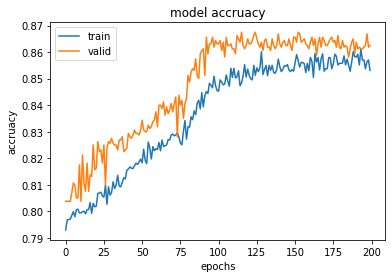

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.title('model accruacy')
plt.ylabel('accruacy')
plt.xlabel('epochs')
plt.legend()
plt.show()


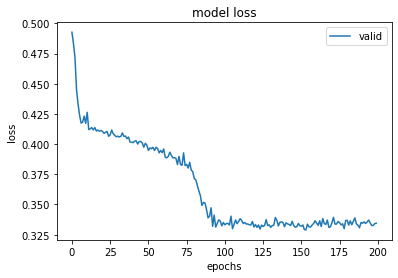

In [32]:
# plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

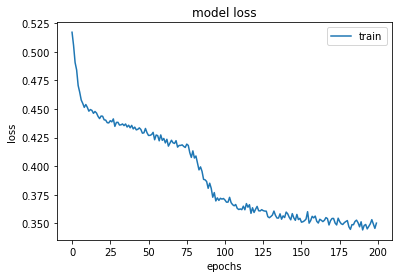

In [33]:
plt.plot(history.history['loss'], label = 'train')
# plt.plot(history.history['val_loss'], label = 'valid')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

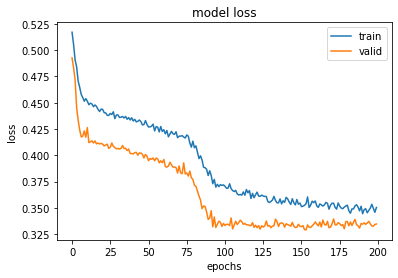

In [34]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

# hyperparemter tuning

- number of hidden layers
- units
- activation
- kernel init
- optimizer
- loss
- epochs
- batch_size

In [ ]:
# tesing the model

y_pred = model.predict(X_test )
y_pred_prob = (y_pred >= 0.7)
y_pred_prob

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
y_pred

array([[0.01402903],
       [0.07479122],
       [0.97932124],
       ...,
       [0.00388372],
       [0.20299459],
       [0.80004585]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_pred_prob , y_test)

array([[1522,  238],
       [  55,  185]])

In [ ]:
accuracy_score(y_pred_prob , y_test)

0.8535

## Save the Model and use in other API

In [ ]:
# saving
model.save('churn_model.h5')

joblib.dump(sc , 'feature_scaling_model.pkl')

['feature_scaling_model.pkl']

In [ ]:
ls

1_DL.ipynb  churn_model.h5       feature_scaling_model.pkl
2_DL.ipynb  Churn_Modelling.csv


## How to load the Model from the Saved model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_model = load_model('churn_model.h5')

In [ ]:
sc  = joblib.load('feature_scaling_model.pkl')
data = sc.transform([[5,2,1,100,1,1,1,8,1,1,9]])
a = loaded_model.predict(data)
a[0] > 0.7

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([False])

In [ ]:
a = (a[0] > 0.7)[0]

In [ ]:
if a == False:
  print('he will not leave')
else:
  print('he will lrave')

he will not leave


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1200      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 7,551
Trainable params: 7,551
Non-trainable params: 0
_________________________________________________________________
